<a href="https://colab.research.google.com/github/StephenMa1511/PortfolioOptimization/blob/main/Portfolio_management_GWP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this GWP, we'll gonna enhance our past work in GWP 2 by using more morden technique to tackle weakness of classical Mean Variance optimization. Specifically, we'll introduce denoising and clustering technique upon our stock choice of 5 companies in GWP2 to and compared the resulting optimized portfolio.


This time, we'll be using all 30 stocks in the DJIA index instead of jsut 5 stocks as in GWP2. The portfolio will be optimized from 1 year period up to 05/01/2024 and then a 1 month forward test to 06/01/2024

Our work is segmented into the following steps:

Step 1: Methodology - we'll describe the concept behind each improvement as well as its theoretical feature and benefits in enhancing porfolio optimization

Step 2: Data Preprocessing and Optimization : we'll process the data and make 5 portfolio including 2 porfolio enhanced by the 2 aforementioned method respectively, 1 portfolio enhanced with both the methods, 1 equal weight porfolio and 1 a classical MVO porfolio. All the portfolio are constrainted by no short selling condition.

Step 3: Result and discussion: the portfolio generated in step 2 will be compared with eachother both in-sample and out-sample in term of 3 metrics that is final return, sharpe ratio and maximum drawdown. After that, we'll give our comment on the insight that could be deduced from our test.


# Step 1 - Methodology

## Denoising

In this technique we reduce the noise in the historical data. There are various sources of noise  - market effects, political unstability and many more. These noise sources should not affect the relationship between securities.

The main advantages of noise are to reduce impact, improve covariance matrix, enhance management of risk and many more. The denoising technique helps us in understanding the relationsip between the securities better helping in the optimization of the portfolio.

### Features :
1. Reduce Noise - The main rule of denoising is to remove the noise from historical data.
2. Improve covariance matrix - It helps in reducing the distortion between the securities and in turn the assessment of our portfolio becomes easier.
3. Better risk management - From the previous point we can rely on covariance matrix as there is reduction of noise which helps in understanding the volatility.
4. Alternate techiniques - Denoising enables investors to use other optimization techniques. Example shrinkage method
5. Signal preservation - There are denoising techniques using which you can preserve the features of data.
6. Filtering - We can employ different kinds of filters based on the dataset and various noise profiles .

### Benefits :  
1. Denoising techniques improve the accuracy of our analysis and make informed decisions.
2. Visualizaition becomes easier - we can understand the trends and the pattern
3. Reliabaility on the denoised data is increased.
4. Denoising reduces the risk of the portfolio and enhances the optimization.

### Methods :

1. Shrinkage method
2. Bayesian method
3. Factor model
4. Robust method

In this document we have used Shrinkage method more specifically the OAS extimator.

It is given by the below formula :

$$\Sigma_{OAS} = (1-ρ^{OAS})S +ρ^{OAS} * F$$

where,

$$Σ^{OAS}$$ is the estimated covariance matrix,

S is the covariance matrix,

F is the Oracle covariance matrix for target,

$$ρ_{OAS}$$ is the shrinkage parameter for MSE minimization.


## Clustering

A basic investor focuses on risk allocation. The goal is to identify the weight vector of risks. In identifying the weight vector asset type and the number of assets are not taken into account . Clustering is a method in machine learning to group the data into categories. Each categories is created based on the commonality of the data within the category.

### Features :
1. They group assets in one category with similar charateristics
2. They indirectly support in creating a diversified portfolio
3. They capture benefit from different securities
4. They support in minimizing risks

### Cluster types :
1.   Hierarchical clustering: In this type categories are formed based on the hierarchy. This method is further divided into: Agglomerative and Divisive. The former type is a bottom-up approach and the latter is a top-down approach.
2.   Centroid Method: In this type categories are defined based on number of centroids and the distance between the centroid and the dataset. Since the number of categories are pre-defined, it is a major drawback.
3.   Gaussian Mixture Models: In this type we assume the data follows a gaussian distribution. So the categories are created based on the parameters defined in the distribution
### How to find the number of clusters?
Given a dataset, there are 3 approaches broadly used to find the number of clusters:
1.   Elbow - In this type we variance is a plot of f(clusters). Once we decide the number of clusters we observe the elbows formed.
2.   Silhouette  - In this type we evaluate the dataset one by one. The evaulation provides us information where a particular data point belongs to a cluster or not.
3.   Gap statistics - In this type we plot the logarithm of the dispersion. This approach gives us the optimized number when the dataset is well captured.

### Benefits of cluster analysis in portfolio management


*  We can diversify our portfolio
*  We can identify the securities that give a positive return/negative return
*  Once we tag securities with return an optimal portfolio can be built

### De-Benefits of clustering

* Clusters cannot be segregated.
* It is very hard for individuals and institutions to use this method opposite in their behaviour.
* Also there are other factors such political factors affecting clusters

We compute the distance to the centroid using the below formula ⁉

$$Distance(k) = \sqrt(Σ_i(x_i - c_i^2)) ∀ k = 1 to K$$
 Now to assign each data point to the closest cluster we use the following optimization :

 $$argmin_k Distance(k)$$

# Step 2 - Optimization

## Data preprocessing

We will use yfinance package to retrive the time series of adjusted daily closing prices from yahoo finance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import yfinance as yf
import pandas_datareader as web
from datetime import datetime as dt, timedelta as td
import numpy as np

style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# tickers = ['AAPL', 'JNJ', 'JPM', 'KO', 'WMT']
ticker_str = 'AMZN AXP AMGN AAPL BA CAT CSCO CVX GS HD HON IBM INTC JNJ KO JPM MCD MMM MRK MSFT NKE PG TRV UNH CRM VZ V WMT DIS DOW ^DJI' # Ticker list from cnbc.com
ticker_list = ticker_str.split(' ')

start="2023-05-01"
end="2024-06-01"
df =  yf.download(ticker_list,start = start , end= end)['Adj Close']
# df.columns = ['AAPL', 'JNJ', 'JPM', 'KO', 'WMT']
ret_df = df.pct_change().dropna()


[*********************100%%**********************]  31 of 31 completed


We then split data into 1 year optimizing and 1 month forward testing


In [ ]:
import datetime
test_time_split = datetime.date(2024, 5, 1)
test_mask = ret_df.index.date >= test_time_split
train_mask = np.invert(test_mask)
stocks_train = ret_df.iloc[:, :-1][train_mask]
stocks_test = ret_df.iloc[:, :-1][test_mask]

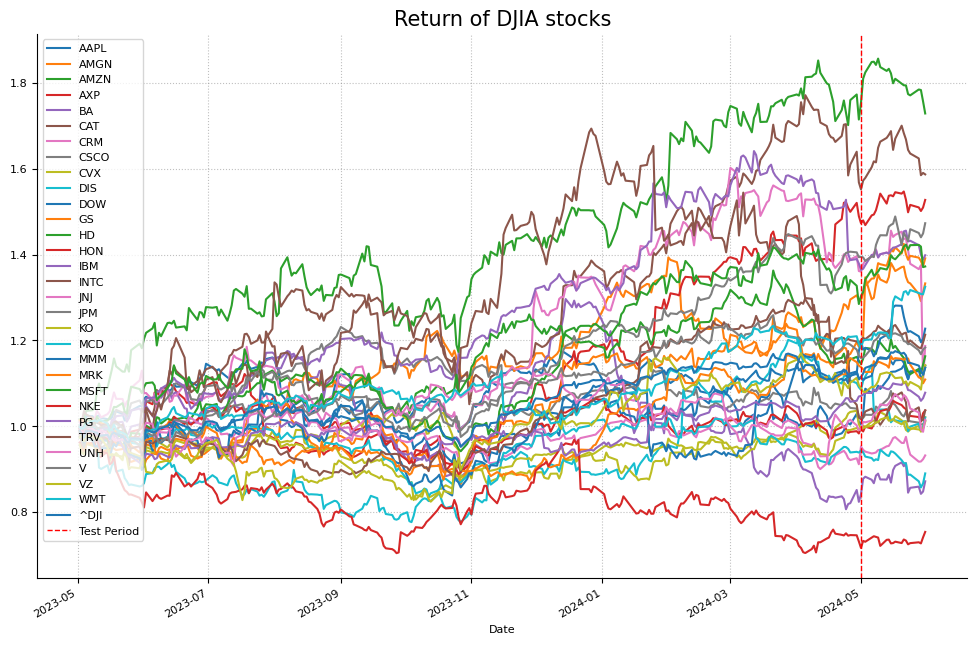

In [ ]:
import matplotlib.pyplot as plt
(1+ ret_df).cumprod().plot(figsize = (12,8))
plt.axvline(test_time_split, color='r', linestyle='--', linewidth=1, label = 'Test Period')
plt.title('Return of DJIA stocks', fontsize = 15)
plt.legend(loc = 'upper left')
plt.show()


Correlation matrix

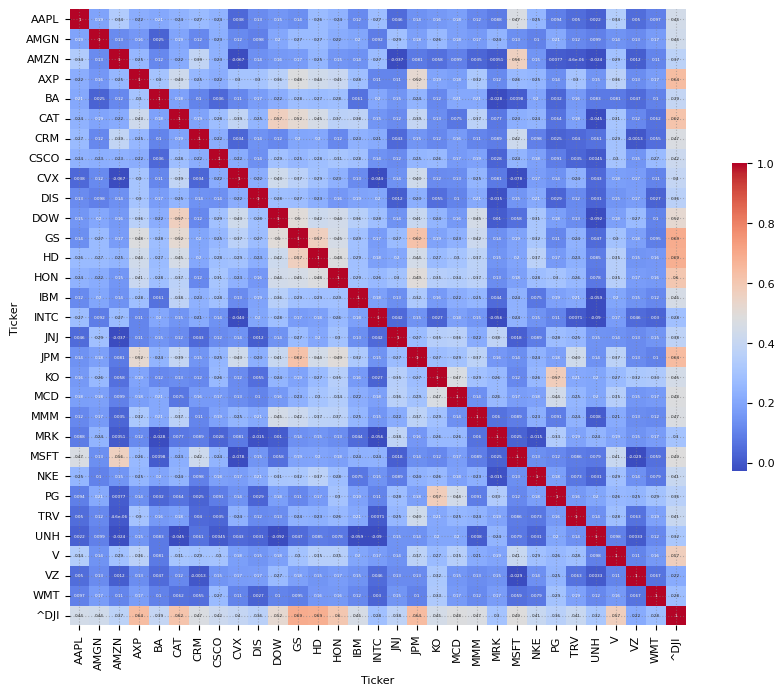

In [ ]:
corr_matrix = ret_df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, robust = True, cmap = 'coolwarm', square=True,
        annot= True, annot_kws={'size': 3}, cbar_kws={'shrink': 0.5})
plt.show()

From the correlation matrix, we observe that the correlations between stocks in the DJIA index are moderately weak, with most pairwise correlations falling within the range of 0 to 0.5. This phenomenon can be explained by the fact that the components of the DJIA index span a broad spectrum of industrial sectors, thereby ensuring that the index is inherently diversified.

## Portfolio construction

## Classical Mean Variance Optimization

In this section, we will use scipy.optimize to solve the optimization problem to find the only long portfolio with the maxium Sharpe ratio

The risk free rate used in this GWP is the US 01 Year Goverment Bond Yield at the end of the training period, which is 4.66%.

In [ ]:
sigma = stocks_train.cov()*252
rf = 0.0466 # risk free rate for the testing period, it is the US01 yield at the the end of the train set time
n_assets = len(stocks_train.columns)
n_assets

30

DownJone index

In [ ]:
DJIA_returns = ret_df['^DJI']
DJIA_volatility = np.std(DJIA_returns) * 252 **0.5
DJIA_sharpe = round((DJIA_returns.mean()*252 - rf)/DJIA_volatility,2)

print(' In sample Equal weights DJIA Anualized return: ', round(DJIA_returns.mean()*252,2))
print(' In sample Equal weights DJIA Anualized Volatility: ', round(DJIA_volatility,2))
print(' In sample Equal weights DJIA Sharpe ratio: ', round(DJIA_sharpe,2))
print("====================================")

 In sample Equal weights DJIA Anualized return:  0.12
 In sample Equal weights DJIA Anualized Volatility:  0.1
 In sample Equal weights DJIA Sharpe ratio:  0.75


Equal weight portfolio

In [ ]:
w_eq = np.ones(30)/n_assets
eqW_returns = stocks_train @ w_eq.T
eqW_volatility = np.std(eqW_returns) * 252 **0.5
eqW_sharpe = round((eqW_returns.mean()*252 - rf)/eqW_volatility,2)

print(' In sample Equal weights Portfolio Anualized return: ', round(eqW_returns.mean()*252,2))
print(' In sample Equal weights Portfolio Anualized Volatility: ', round(eqW_volatility,2))
print(' In sample Equal weights Portfolio Sharpe ratio: ', round(eqW_sharpe,2))
print("====================================")

 In sample Equal weights Portfolio Anualized return:  0.15
 In sample Equal weights Portfolio Anualized Volatility:  0.1
 In sample Equal weights Portfolio Sharpe ratio:  1.01


Optimal Portfolio (Maximum in-sample Sharpe ratio)

In [ ]:
from scipy.optimize import minimize

# Set up the problem parameters
# n_assets = len(stocks_train.columns)
mean_returns = stocks_train.mean() *252
cov_matrix = stocks_train.cov() *252

# Define the objective function for the optimization problem
def objective(w):
    return -((mean_returns.values @ w) - rf) / (np.sqrt(w.T @ cov_matrix.values @ w))

# Define the constraint for the optimization problem
def constraint(w):
    return 1 - np.sum(w)

# Solve the optimization problem to find the minimum variance portfolio
bounds = [(0, 1) for _ in range(n_assets)]
initial_guess = np.ones(n_assets) / n_assets
result = minimize(objective, initial_guess, constraints={'type': 'eq', 'fun': constraint}, bounds=bounds)

# Extract the optimal portfolio weights
optimal_weights = result.x

print('Denoised optimal weights:')
for i in range(len(stocks_train.columns)) :
    print(stocks_train.columns[i], ': ', round(optimal_weights[i],2))

optP_returns =  stocks_train @ optimal_weights.T
optP_volatility = np.std(optP_returns) * 252 **0.5
opt_sharpe = round((optP_returns.mean()*252 - rf)/optP_volatility,2)

print('In Sample Optimal Portfolio Anualized return: ', round(optP_returns.mean()*252,2))
print('In Sample OptimalPortfolio Anualized Volatility: ', round(optP_volatility,2))
print('In Sample OptimalPortfolio Sharpe ratio: ', round(opt_sharpe,2))
print("====================================")

Denoised optimal weights:
AAPL :  0.0
AMGN :  0.0
AMZN :  0.24
AXP :  0.06
BA :  0.0
CAT :  0.07
CRM :  0.0
CSCO :  0.0
CVX :  0.0
DIS :  0.0
DOW :  0.0
GS :  0.0
HD :  0.0
HON :  0.0
IBM :  0.13
INTC :  0.0
JNJ :  0.0
JPM :  0.3
KO :  0.0
MCD :  0.0
MMM :  0.0
MRK :  0.06
MSFT :  0.0
NKE :  0.0
PG :  0.0
TRV :  0.0
UNH :  0.0
V :  0.0
VZ :  0.0
WMT :  0.13
In Sample Optimal Portfolio Anualized return:  0.39
In Sample OptimalPortfolio Anualized Volatility:  0.13
In Sample OptimalPortfolio Sharpe ratio:  2.67


## Enhanced Portfolio optimization

### Denoising


In this section, we employ the Oracle Approximating Shrinkage (OAS) algorithm to determine the optimal coefficient for shrinking the covariance matrix, thereby suppressing estimation errors in the in-sample covariance matrix. The OAS method is selected due to its superior robustness in choosing the shrinkage parameter compared to the Ledoit-Wolf and Rao-Blackwell Ledoit-Wolf (RBLW) methods, as documented by Yilun Chen (2009).

In [ ]:
from sklearn import covariance

In [ ]:
shrunk_cov, shrinkage = covariance.oas(stocks_train)
print('OAS shrinkage coeficient : ',shrinkage)

OAS shrinkage coeficient :  0.07320552335226176


We obtained a shrinkage coefficient of 0.073, which is notably low. This indicates that our shrunk covariance matrix deviates only marginally from the sample matrix. This outcome can be attributed to the low correlations between assets in the DJIA index, suggesting that the index is already well-diversified. Next, we will examine the extent to which the weights of our denoised portfolio deviate from those of the optimal portfolio.

In [ ]:
denoised_cov_matrix = shrunk_cov *252

# Define the objective function for the optimization problem
def objective(w):
    return -((mean_returns.values @ w) - rf) / (np.sqrt(w.T @ denoised_cov_matrix @ w))

# Define the constraint for the optimization problem
def constraint(w):
    return 1 - np.sum(w)

# Solve the optimization problem to find the minimum variance portfolio
bounds = [(0, 1) for _ in range(n_assets)]
initial_guess = np.ones(n_assets) / n_assets
result = minimize(objective, initial_guess, constraints={'type': 'eq', 'fun': constraint}, bounds=bounds)

# Extract the optimal portfolio weights
denoised_weights = result.x

print('Denoised weights:')
for i in range(len(stocks_train.columns)) :
    print(stocks_train.columns[i], ': ', round(denoised_weights[i],2))

denoised_returns =  stocks_train @ denoised_weights.T
denoised_volatility = np.std(denoised_returns) * 252 **0.5
denoised_sharpe = round((denoised_returns.mean()*252 - rf)/denoised_volatility,2)

print('In Sample Denoised Portfolio Anualized return: ', round(denoised_returns.mean()*252,2))
print('In Sample Denoised Portfolio Anualized Volatility: ', round(denoised_volatility,2))
print('In Sample Denoised Sharpe ratio: ', round(denoised_sharpe,2))
print("============================================================")

print('Number of similar weights between denoised portfolio and optimal portfolio:')
print(np.isclose(denoised_weights, optimal_weights).sum())

Denoised weights:
AAPL :  0.0
AMGN :  0.0
AMZN :  0.24
AXP :  0.08
BA :  0.0
CAT :  0.09
CRM :  0.0
CSCO :  0.0
CVX :  0.0
DIS :  0.0
DOW :  0.0
GS :  0.0
HD :  0.0
HON :  0.0
IBM :  0.14
INTC :  0.0
JNJ :  0.0
JPM :  0.27
KO :  0.0
MCD :  0.0
MMM :  0.0
MRK :  0.06
MSFT :  0.0
NKE :  0.0
PG :  0.0
TRV :  0.01
UNH :  0.0
V :  0.0
VZ :  0.0
WMT :  0.12
In Sample Denoised Portfolio Anualized return:  0.39
In Sample Denoised Portfolio Anualized Volatility:  0.13
In Sample Denoised Sharpe ratio:  2.67
Number of similar weights between denoised portfolio and optimal portfolio:
22


We can see that due to minimal shinkage of covariance matrix, 22/30 weights of the 2 portfolio are similar, thus leading to a very identical in-sample perfomance statistic

### Clustering

In this section, we'll use Hierachical Risk Parity Algorithm which was propose by professor López de Prado, M. (2016) to  perform portfolio allocation amongs all 30 components of DJIA index.

Firstable, we compute the linkage matrix and quasi- diagonaal correlation matrix from the original correlation matrix

In [ ]:
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.cluster import hierarchy

Linkage Matrix


array([[11.        , 17.        ,  0.6281974 ,  2.        ],
       [ 2.        , 22.        ,  0.66915018,  2.        ],
       [ 5.        , 10.        ,  0.67112543,  2.        ],
       [12.        , 30.        ,  0.67714749,  3.        ],
       [18.        , 24.        ,  0.67837966,  2.        ],
       [ 3.        , 33.        ,  0.71576314,  4.        ],
       [32.        , 35.        ,  0.71681696,  6.        ],
       [13.        , 36.        ,  0.71859749,  7.        ],
       [ 6.        , 31.        ,  0.73759106,  3.        ],
       [ 0.        , 38.        ,  0.73876998,  4.        ],
       [19.        , 34.        ,  0.76002531,  3.        ],
       [20.        , 37.        ,  0.76394838,  8.        ],
       [16.        , 21.        ,  0.79601479,  2.        ],
       [27.        , 39.        ,  0.80310745,  5.        ],
       [ 8.        , 41.        ,  0.82319926,  9.        ],
       [14.        , 44.        ,  0.82790738, 10.        ],
       [ 1.        , 42.

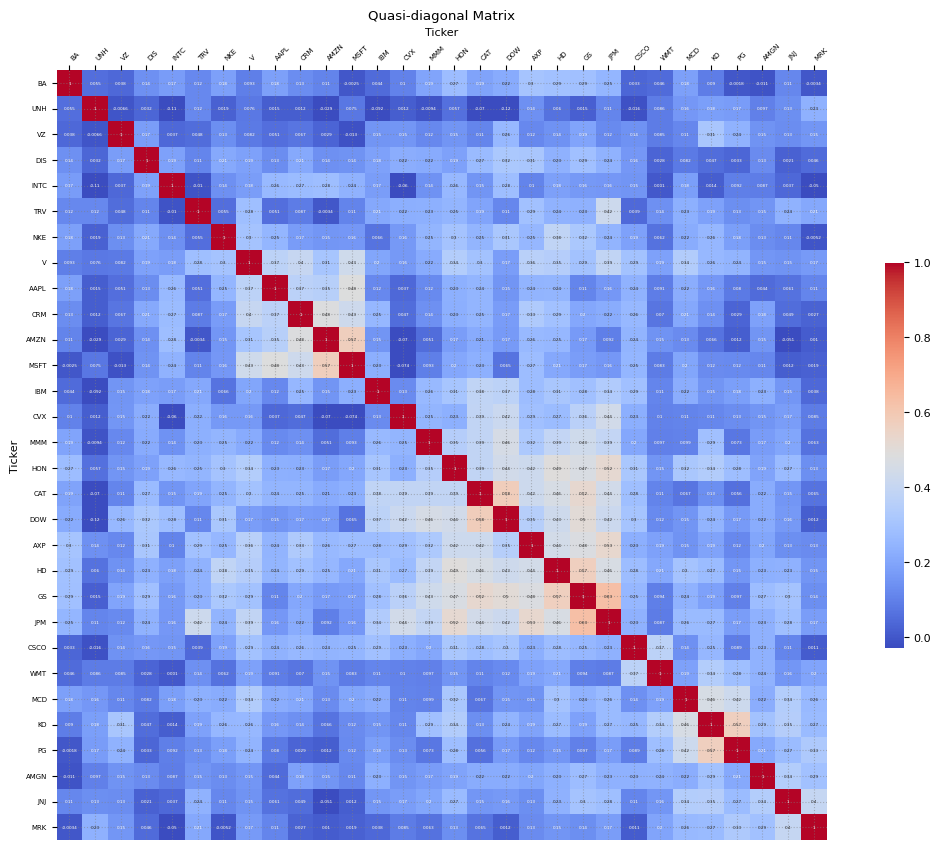

In [ ]:
# get correlatrion matrix
corr_matrix = stocks_train.corr()
corr_matrix
dist_matrix = np.sqrt(0.5*(1-corr_matrix)) # compute distance matrix

# get linkage matrix

linkage_matrix = linkage(dist_matrix, method = 'single')
print('Linkage Matrix')
display(linkage_matrix)
order = leaves_list(linkage_matrix)
plt.figure(figsize = (15,10))
ax = sns.heatmap(corr_matrix.iloc[order,order], robust = True, cmap = 'coolwarm', square=True,
        annot= True, annot_kws={'size': 3}, cbar_kws={'shrink': 0.5})
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha='left', fontsize = 5)
plt.yticks(rotation=0, ha='right', fontsize = 5)
plt.title('Quasi-diagonal Matrix')
plt.show()

The hierarchical structure of our cluster data is presented in the dendogram below

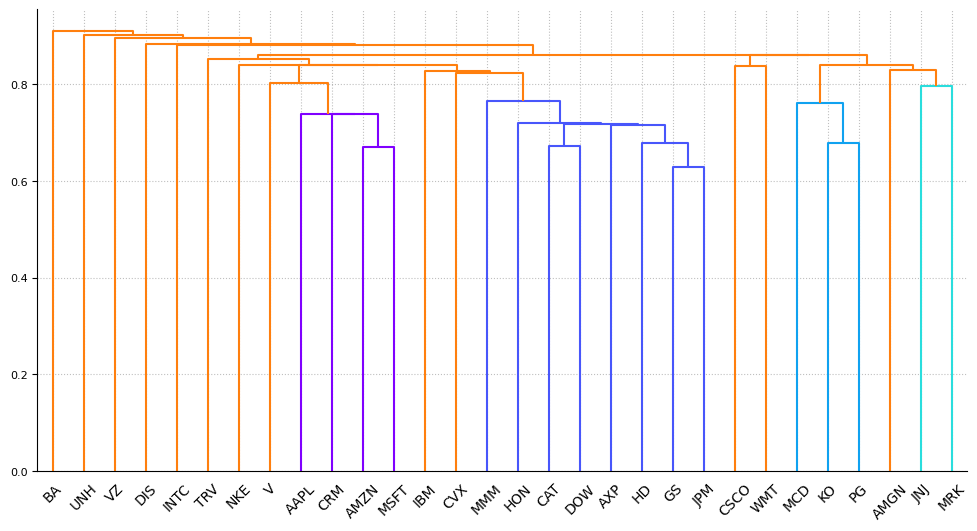

In [ ]:
import matplotlib as mpl
from matplotlib.pyplot import cm

cmap = cm.rainbow(np.linspace(0, 1, 10))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
# hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(figsize=(12, 6))
dn1 = hierarchy.dendrogram(linkage_matrix, ax=axes, color_threshold = 0.8,above_threshold_color = 'C1',
                           orientation='top', labels = corr_matrix.index)
# hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

With optimization, we use PyPortfolioOpt - an open source libary designed for portfolio optimization to cunstruct our HRP optimization

In [ ]:
%%capture
!pip install PyPortfolioOpt


In [ ]:
from pypfopt.hierarchical_portfolio import HRPOpt

HRP weight: 


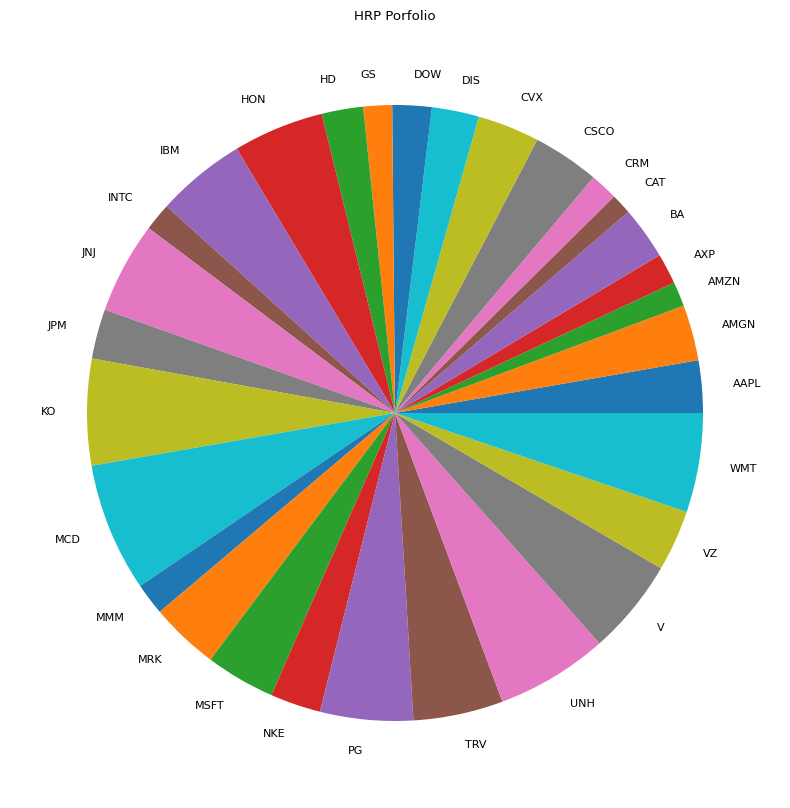

In [ ]:
hrp = HRPOpt(returns = stocks_train)
hrp.optimize()
hrp_weights = pd.Series(hrp.clean_weights())
print('HRP weight: ')
# print(hrp_weights)
hrp_weights.plot.pie(figsize=(10, 10))
plt.title('HRP Porfolio')
plt.show()

In [ ]:
hrp_returns =  stocks_train @ hrp_weights
hrp_volatility = np.std(hrp_returns) * 252 **0.5
hrp_sharpe = round((hrp_returns.mean()*252 - rf)/hrp_volatility,2)

print('In Sample HRP Portfolio Anualized return: ', round(hrp_returns.mean()*252,2))
print('In Sample HRP Anualized Volatility: ', round(hrp_volatility,2))
print('In Sample HRP Sharpe ratio: ', round(hrp_sharpe,2))
print("====================================")

In Sample HRP Portfolio Anualized return:  0.11
In Sample HRP Anualized Volatility:  0.09
In Sample HRP Sharpe ratio:  0.7


### Denoising and Clustering combined

In [ ]:
denoised_cov_df = cov_matrix.copy()
denoised_cov_df = pd.DataFrame(denoised_cov_matrix, columns = cov_matrix.columns, index = cov_matrix.index )
# denoised_cov_df

HRP DN Combined weight: 


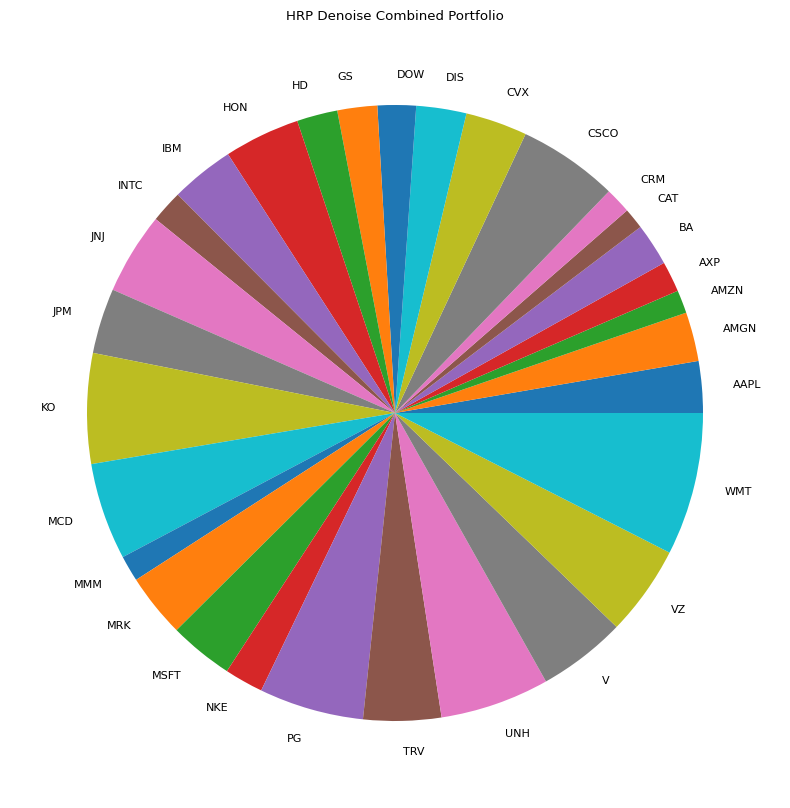

In [ ]:
hrp_combined = HRPOpt(cov_matrix = denoised_cov_df)
hrp_combined.optimize()
hrp_combined_weights = pd.Series(hrp_combined.clean_weights())
print('HRP DN Combined weight: ')
# print(hrp_combined_weights)
hrp_combined_weights.plot.pie(figsize=(10, 10));
plt.title('HRP Denoise Combined Portfolio')
plt.show()

In [ ]:
combined_returns =  stocks_train @ hrp_combined_weights
combined_volatility = np.std(combined_returns) * 252 **0.5
combined_sharpe = round((combined_returns.mean()*252 - rf)/combined_volatility,2)

print('In Sample Combined Portfolio Anualized return: ', round(combined_returns.mean()*252,2))
print('In Sample Combined Anualized Volatility: ', round(combined_volatility,2))
print('In Sample Combined Sharpe ratio: ', round(combined_sharpe,2))
print("====================================")

In Sample Combined Portfolio Anualized return:  0.11
In Sample Combined Anualized Volatility:  0.09
In Sample Combined Sharpe ratio:  0.78


## In sample optimization summary

In [ ]:
weights_df = pd.DataFrame({
    'Combined Portfolio': hrp_combined_weights,
    'Optimal Portfolio': optimal_weights,
    'HRP Portfolio': hrp_weights,
    'Equal Weight Portfolio': w_eq,
    'Denoised Portfolio': denoised_weights
})
weights_df = weights_df.round(2)
print('Weights of portfolios')

print(weights_df.to_string())


Weights of portfolios
      Combined Portfolio  Optimal Portfolio  HRP Portfolio  Equal Weight Portfolio  Denoised Portfolio
AAPL                0.03               0.00           0.03                    0.03                0.00
AMGN                0.03               0.00           0.03                    0.03                0.00
AMZN                0.01               0.24           0.01                    0.03                0.24
AXP                 0.02               0.06           0.02                    0.03                0.08
BA                  0.02               0.00           0.03                    0.03                0.00
CAT                 0.01               0.07           0.01                    0.03                0.09
CRM                 0.01               0.00           0.01                    0.03                0.00
CSCO                0.05               0.00           0.03                    0.03                0.00
CVX                 0.03               0.00        

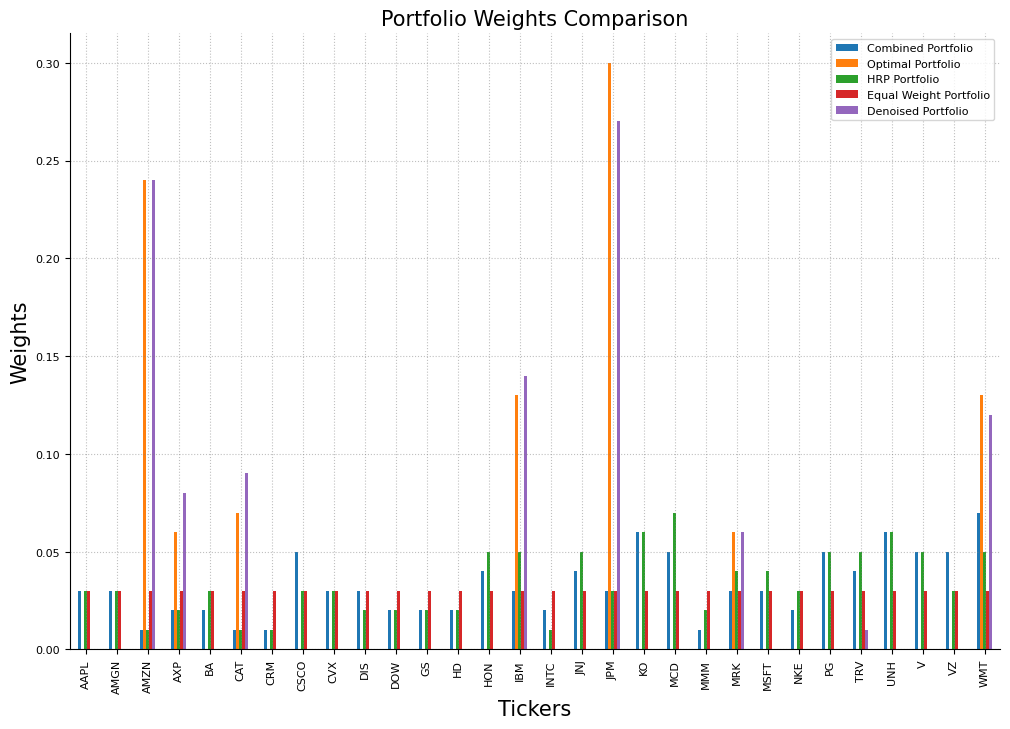

In [ ]:
weights_df.plot.bar(figsize=(12, 8))
plt.title('Portfolio Weights Comparison', fontsize=15)
plt.ylabel('Weights', fontsize=15)
plt.xlabel('Tickers', fontsize=15)
plt.xticks(rotation=90)
plt.show()


In [ ]:
portfolio_stats = {
    'Annualized Mean Return': [eqW_returns.mean()*252, optP_returns.mean()*252, denoised_returns.mean()*252, hrp_returns.mean()*252, combined_returns.mean()*252],
    'Annualized Sharpe Ratio': [eqW_sharpe, opt_sharpe, denoised_sharpe, hrp_sharpe, combined_sharpe],
    'Annualized Volatility': [eqW_volatility, optP_volatility, denoised_volatility, hrp_volatility, combined_volatility]
}

# Create a DataFrame from the dictionary
stats_train = pd.DataFrame(portfolio_stats, index=['Equal Weight', 'Optimal', 'Denoised', 'HRP', 'Combined']).round(3)

# Print the DataFrame
print('In sample portfolio optimization statistics:')
print(stats_train.to_string())


In sample portfolio optimization statistics:
              Annualized Mean Return  Annualized Sharpe Ratio  Annualized Volatility
Equal Weight                   0.148                     1.01                  0.100
Optimal                        0.387                     2.67                  0.127
Denoised                       0.391                     2.67                  0.129
HRP                            0.109                     0.70                  0.088
Combined                       0.115                     0.78                  0.088


From the resulting table and graphs, we observe the following:

The Optimal Portfolio is highly concentrated in a few stocks: AMZN (24%), JPM (30%), and WMT (13%). This concentration arises from the strategy's objective to maximize the Sharpe ratio based on historical data, leading to substantial investments in stocks that previously demonstrated high returns relative to their risk. The Denoised Portfolio closely resembles the Optimal Portfolio due to minimal shrinkage, with significant allocations to AMZN (24%), JPM (27%), and WMT (12%). Both portfolios exhibit the highest annualized mean returns (39%) and Sharpe ratios (2.67), but also display higher volatility (12.8%).

The HRP Portfolio distributes weights more evenly compared to the Optimal and Denoised Portfolios, yet still assigns higher weights to some stable stocks such as HON, KO, MCD, PG, and TRV. This is because the HRP method emphasizes risk parity among clusters of assets rather than solely relying on past performance. The Combined Portfolio aims to achieve a balance, resulting in an even more diversified allocation with slight overweights in stable stocks such as KO (6%), UNH (6%), and WMT (7%). Both the HRP and Combined Portfolios belong to the in-sample underperforming category, with Sharpe ratios of 0.7 and 0.78 respectively, which are lower than that of the Equal Weight Portfolio.

# Step 3 - Testing out of sample


In this section, we will evaluate our portfolios over a one-month out-of-sample period to determine if their characteristics remain consistent when applied to unseen data.

In [ ]:
# In sample Equal weights Portfolio
eqW_returns_test = stocks_test @ w_eq.T
eqW_volatility_test = np.std(eqW_returns_test) * 252 **0.5
eqW_sharpe_test = round((eqW_returns_test.mean()*252 - rf)/eqW_volatility_test,2)


# Optimal Portfolio (Maximum in-sample Sharpe ratio)
optP_returns_test = stocks_test @ optimal_weights.T
optP_volatility_test = np.std(optP_returns_test) * 252 **0.5
opt_sharpe_test = round((optP_returns_test.mean()*252 - rf)/optP_volatility_test,2)


# Denoised Portfolio
denoised_returns_test =  stocks_test @ denoised_weights.T
denoised_volatility_test = np.std(denoised_returns_test) * 252 **0.5
denoised_sharpe_test = round((denoised_returns_test.mean()*252 - rf)/denoised_volatility_test,2)


# HRP Portfolio
hrp_returns_test =  stocks_test @ hrp_weights
hrp_volatility_test = np.std(hrp_returns_test) * 252 **0.5
hrp_sharpe_test = round((hrp_returns_test.mean()*252 - rf)/hrp_volatility_test,2)



# Combined Portfolio
combined_returns_test =  stocks_test @ hrp_combined_weights
combined_volatility_test = np.std(combined_returns_test) * 252 **0.5
combined_sharpe_test = round((combined_returns_test.mean()*252 - rf)/combined_volatility_test,2)

#DJIA oos performance
DJIA_ret_train = DJIA_returns[train_mask]
DJIA_ret_test = DJIA_returns[test_mask]

DJIA_volatility_test = np.std(DJIA_ret_test) * 252 **0.5
DJIA_sharpe_test = round((DJIA_ret_test.mean()*252 - rf)/DJIA_volatility_test,2)


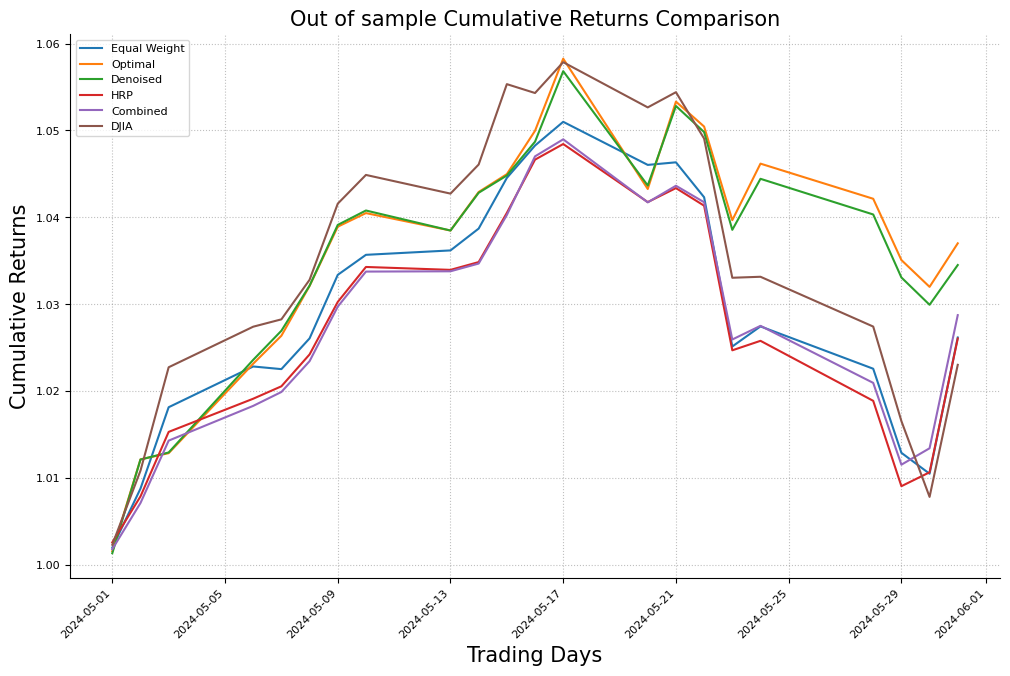

In [ ]:
cumulative_returns = pd.DataFrame({
    'Equal Weight': (1 + eqW_returns_test).cumprod(),
    'Optimal': (1 + optP_returns_test).cumprod(),
    'Denoised': (1 + denoised_returns_test).cumprod(),
    'HRP': (1 + hrp_returns_test).cumprod(),
    'Combined': (1 + combined_returns_test).cumprod(),
    'DJIA': (1 + DJIA_ret_test).cumprod()
})

# Plot the cumulative returns
cumulative_returns.plot(figsize=(12, 8))
plt.title('Out of sample Cumulative Returns Comparison', fontsize=15)
plt.ylabel('Cumulative Returns', fontsize=15)
plt.xlabel('Trading Days', fontsize=15)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


In [ ]:
portfolio_stats_test = {
    'Annualized Mean Return': [eqW_returns_test.mean()*252, optP_returns_test.mean()*252, denoised_returns_test.mean()*252, hrp_returns_test.mean()*252, combined_returns_test.mean()*252, DJIA_ret_test.mean()*252],
    'Annualized Sharpe Ratio': [eqW_sharpe_test, opt_sharpe_test, denoised_sharpe_test, hrp_sharpe_test, combined_sharpe_test,DJIA_sharpe_test ],
    'Annualized Volatility': [eqW_volatility_test, optP_volatility_test, denoised_volatility_test, hrp_volatility_test, combined_volatility_test, DJIA_volatility_test]
}


stats_test = pd.DataFrame(portfolio_stats_test, index=['Equal Weight', 'Optimal', 'Denoised', 'HRP', 'Combined','DJIA']).round(3)

# Print the DataFrame
print('Out of sample portfolio optimization statistics:')
print(stats_test.to_string())


Out of sample portfolio optimization statistics:
              Annualized Mean Return  Annualized Sharpe Ratio  Annualized Volatility
Equal Weight                   0.301                     2.48                  0.103
Optimal                        0.422                     3.71                  0.101
Denoised                       0.394                     3.54                  0.098
HRP                            0.300                     2.52                  0.100
Combined                       0.330                     2.87                  0.099
DJIA                           0.267                     1.92                  0.115


Based on the resulting statistics, we note that the Optimal Portfolio and Denoised Portfolio achieve the highest out-of-sample returns and Sharpe ratios, at 3.71 and 3.54, respectively. This performance can be attributed to the continued success of high-performing stocks identified during the training period. However, the concentration in these stocks also heightens the risk if they underperform.

The HRP, Denoised, and Equal Weight Portfolios share the second tier of performance, with Sharpe ratios ranging from 2.48 to 2.87. It is important to highlight that, while the HRP and Combined Portfolios significantly underperformed the Equal Weight Portfolio during the training period, they surpassed the Equal Weight benchmark during the testing period.

Additionally, we made a table to observe the improvement on the 3 main metrics between our in-sample and out-sample test

In [ ]:
improvement_df = (stats_test.iloc[:-1:].astype(float)/stats_train.astype(float) -1)*100
improved_df = improvement_df.round(2).applymap('{:.2f}%'.format)
print('Improvement statistic')
print(improved_df.to_string())

Improvement statistic
             Annualized Mean Return Annualized Sharpe Ratio Annualized Volatility
Equal Weight                103.38%                 145.54%                 3.00%
Optimal                       9.04%                  38.95%               -20.47%
Denoised                      0.77%                  32.58%               -24.03%
HRP                         175.23%                 260.00%                13.64%
Combined                    186.96%                 267.95%                12.50%


With the enhancement statistics presented above, it is evident that the most notable improvements are observed in the HRP and Combined portfolios, with Sharpe ratio growths of 260% and 267% respectively. This suggests that the HRP and Combined portfolios may efficiently capture the underlying signals compared to the classical optimized portfolio, thereby leading to enhanced out-of-sample performance. Additionally it also implied a phenomenon in the DJIA that, big stocks with more 'conservative' perfomance in the testing periods could be more likely to outperfom its past perfomance significantly in the forward test

# Summary

In this final group work project, we have futher out discovery by venturing into the area of enhancedment portfolio optimization. Wielded with 2 robust method namely Denoising and Clustering, we have introduced the enhancements into our portfolio optimization problem in GWP2 with extended choices of 30 stocks from DJIA index.

With 1 year optimizing followed by 1 month forward test, Our findings reveal that the combined HRP and HRP-Denoise methodology significantly outperforms the in-sample optimization, achieving a remarkable improvement in out-of-sample performance by approximately 260%. This enhancement not only translates to superior realized returns but also fosters a well-diversified portfolio with minimal overweighting of individual stocks. Consequently, this approach leads to more stable results compared to the traditional mean-variance optimization, which is susceptible to estimation errors.
However, our work here is far from perfect and here the list that we could do in the furture to enrich our understanding of the portfolio optimization problem

1. Expanding the Data History: We can incorporate a longer history dataset with non-overlapping testing periods. This will enable us to assess the robustness of the enhancement across market history, strengthening the validity of our findings.
2. Exploring the Alternative HRP Methods: Building upon the work of Nanakorn et al. (2021), we can investigate the application of two advanced HRP variants. Evaluating these alternative methods alongside the original HRP algorithm will allow us to determine if they offer superior performance.
3. Universal Applicability: To enhance our understanding of the methods' generalizability, we can apply the enhanced portfolio optimization approach to a more comprehensive universe of stocks, encompassing both domestic and international markets. This broader application will solidify the robustness of the methodology.

# Reference
Nanakorn, Natasha, and Elin Palmgren. "Hierarchical Clustering in Risk-Based Portfolio Construction." 2021. KTH Royal Institute of Technology School of Engineering Sciences, Independent thesis, Advanced level.

de Prado, Marcos Lopez and Michael Lewis. "Detection of False Investment Strategies Using Unsupervised Learning Methods.

Pedregosa, Fabian et al. ["Shrinkage Covariance Estimation: LedoitWolf vs OAS and Max-Likelihood." Scikit-learn"](https://scikit-learn.org/stable/auto_examples/covariance/plot_covariance_estimation.html#sphx-glr-auto-examples-covariance-plot-covariance-estimation-py)

Chen, Yilun et al. "Shrinkage Algorithms for MMSE Covariance Estimation." Arxiv, 27 July 2009

PyPortfolioOpt libary